In [2]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("GPU Device Name: ", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1
GPU Device Name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(512, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
  21/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1019 - loss: 2.3334  

I0000 00:00:1718887867.497981     130 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718887867.518407     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2281 - loss: 2.0341

W0000 00:00:1718887890.055762     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.2282 - loss: 2.0340 - val_accuracy: 0.4955 - val_loss: 1.3847
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4646 - loss: 1.4940 - val_accuracy: 0.5536 - val_loss: 1.2244
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5311 - loss: 1.3232 - val_accuracy: 0.5916 - val_loss: 1.1507
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5709 - loss: 1.2226 - val_accuracy: 0.6158 - val_loss: 1.0968
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5990 - loss: 1.1542 - val_accuracy: 0.6341 - val_loss: 1.0681
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6195 - loss: 1.1005 - val_accuracy: 0.6504 - val_loss: 1.0040
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6306 - loss: 1.0772 - val_accuracy: 0.6536 - val_loss: 0.9760
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6441 - loss: 1.03

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7641 - loss: 0.7481


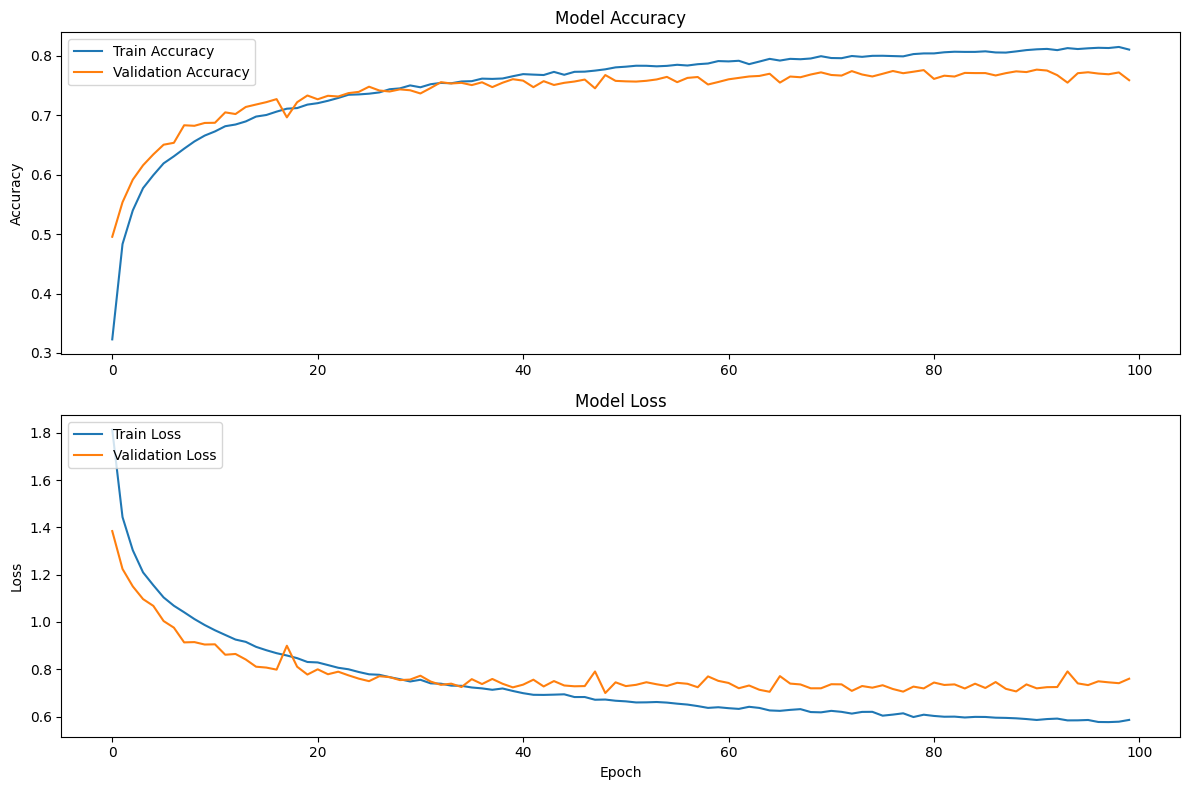

In [9]:
import matplotlib.pyplot as plt

# Visualize the training results
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].legend(loc='upper left')

# Plot training & validation loss values
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Model Loss')
axs[1].legend(loc='upper left')


plt.tight_layout()
plt.show()

In [10]:
# Make predictions
predictions = model.predict(x_test, verbose=1)

 84/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1718889227.353059     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


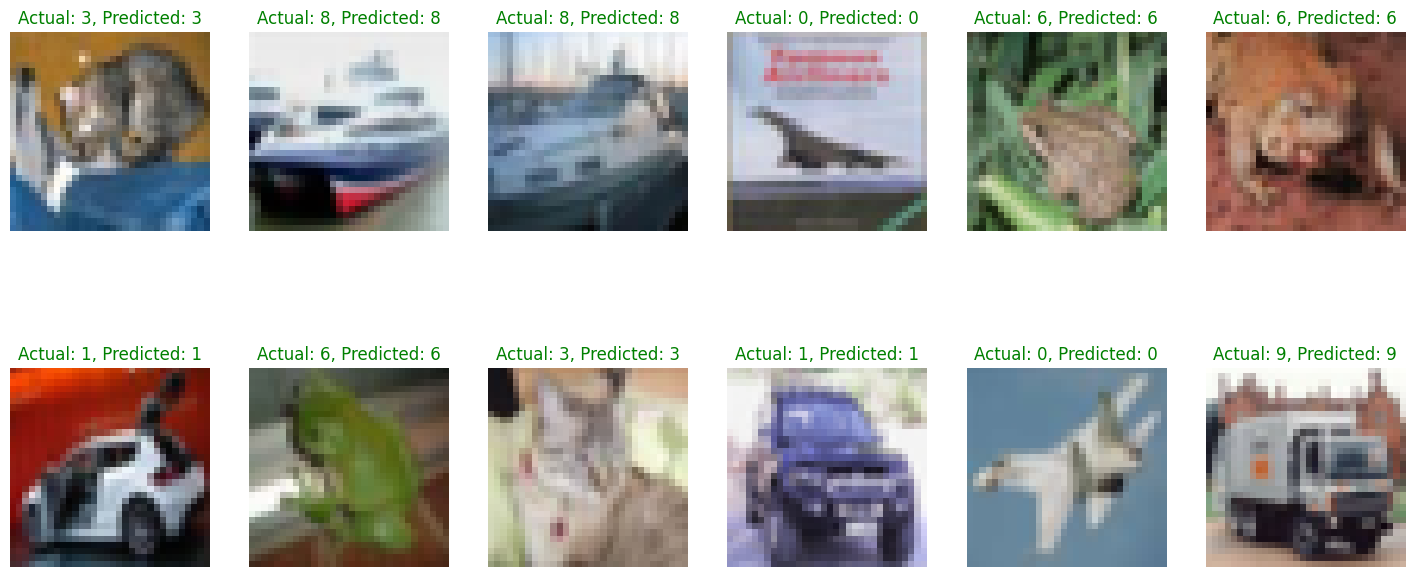

In [11]:
import numpy as np

# Plot predicted vs actual results
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Display the first 10 images and their predicted classes
plt.figure(figsize=(18, 8))
for i in range(12):
    ax = plt.subplot(2, 6, i + 1)
    plt.imshow(x_test[i])
    if y_pred_classes[i] == y_true[i]:
        plt.title(f"Actual: {y_true[i]}, Predicted: {y_pred_classes[i]}", color='green')
    elif y_pred_classes[i] != y_true[i]:
        plt.title(f"Actual: {y_true[i]}, Predicted: {y_pred_classes[i]}", color='red')
    plt.axis("off")